In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

### Problem setup

We set up a problem with constant advection.  There are a few things to adjust in this code block:
* `T` is the period.  You can observe more dissipation with a longer run.
* `nx` is the spatial resolution.
* `gamma` is the factor $a h_t / h_x$ and will be a central component of $s(kh_x)$
* `kmode` to observe the dissipation directly, start with a specific Fourier mode $\sin(k_{\text{mode}} \pi x)$

In [2]:
c = 1.0 # advection speed
T = 1.0 # end time

nx = 100# spacial size

x = np.linspace(0, 1, nx, endpoint=False)
hx = x[1] - x[0]
xx = np.linspace(0, 1, 1000, endpoint=False)

gamma = 0.95 # gamma parameter
ht = hx * gamma / c
nt = int(T/ht)

print(f'     T = {T}')
print(f'tsteps = {nt}')
print(f'    hx = {hx}')
print(f'    ht = {ht}')
print(f' gamma = {gamma}')

def pulse(x):
    return np.exp(-100*(x-0.5)**2)

kmode = 6 # which mode?
def sinusoidal(x):
    return np.sin(kmode * np.pi * x)

def hump(x):
    u = np.zeros_like(x)
    I = np.where((x>=0.2) & (x<=0.4))[0]
    u[I] = -100 * (x[I]-0.2) * (x[I]-0.4)
    return u

uinit = sinusoidal

     T = 1.0
tsteps = 105
    hx = 0.01
    ht = 0.0095
 gamma = 0.95


#### Plot the initial condition

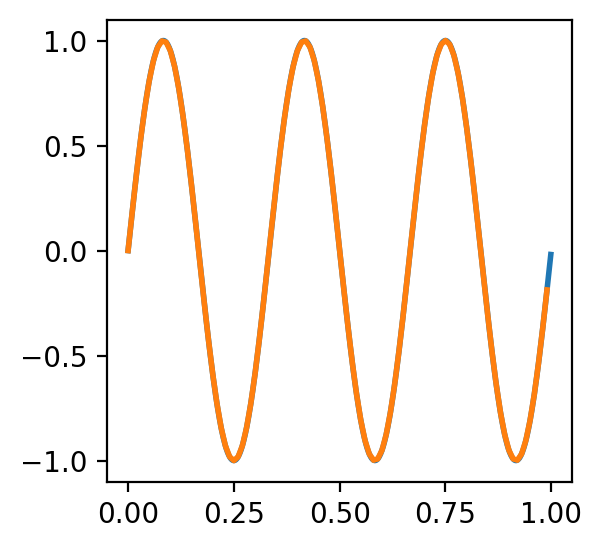

In [3]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(xx, uinit(xx), lw=2, clip_on=False)
ax.plot(x, uinit(x), lw=2, clip_on=False)

### Run `nt` steps

Here we can run ETBS for `nt` steps (set by `gamma` above).

Of note -- at the end of `T`, plot the exact solution (blue) and the numerical solution (organge).  Then calculate
$$
s(k h_x) = 1 - \gamma + \gamma e^{- \imath \pi k h_x}
$$
for $k=k_{\text{mode}}$.  Plot this with a dashed line.

Notice the reduction in mode $k$ after `nt` steps.

0.9153793149092712


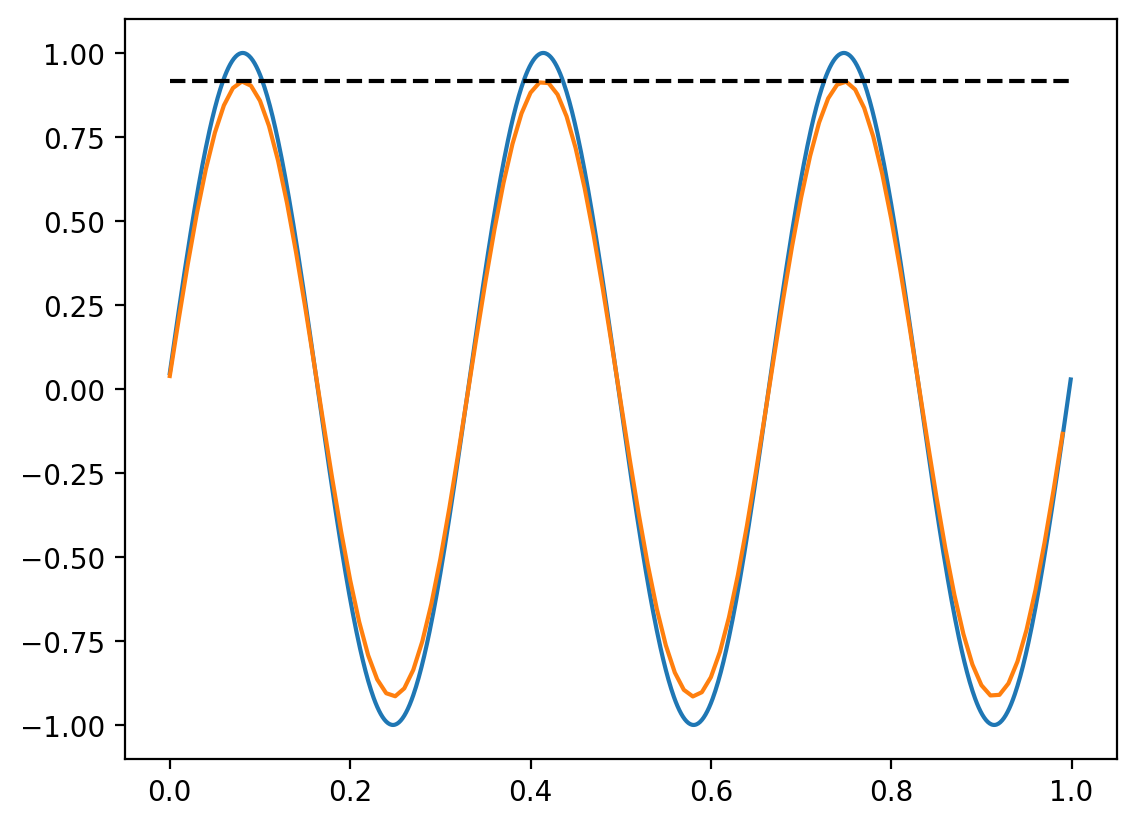

In [4]:
J = np.arange(0, nx)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

u = uinit(x)
for tstep in range(1, nt+1):
    
    u[J] = u[J] - gamma * (u[J] - u[Jm1])
    
    #u[J] = u[J] - (gamma / 2.0) * (u[Jp1] - u[Jm1]) \
    #     + (gamma**2 / 2.0) * (u[Jp1] - 2 * u[J] + u[Jm1])
    
    uexact = uinit((xx - c * tstep * ht) % 1.0)

plt.plot(xx, uexact, 'tab:blue')
plt.plot(x, u, 'tab:orange')

s = 1 - gamma + gamma * np.exp(- 1j * np.pi * kmode * hx)
amp = np.abs(s)**nt
plt.hlines(amp, 0, 1, 'k', '--')
print(amp)

#### Why?

Let's take a look at the amplification factor which controls dissipation, namely $|s|$ in the term
$$
z_{j,\ell} = z_0 |s|^{\ell} e^{-i \pi k j h_x - (\frac{\phi}{h_t})\ell h_t}
$$
Notice that this is for *any* mode $k$ since $s = s(kh_x)$.

Let's look at a few things.  Let's plot *every* value of $s(kh_x)$ (for a fixed $h_x$) and for all modes $k$.  Also note in this form we're using a modification with $\pi$ in the exponent, in order to map to the periodic $[0,1]$ domain.  Here is $s(kh_x)$:
$$
s(k h_x) = 1 - \gamma + \gamma e^{- \imath \pi k h_x}
$$

This unit circle is in black.  The circle formed by $s()$ is dashed.  Then the $k$ modes from $0\ldots n_x-1$ are plotted on top of that.  In these cases, it appears that the highest mode $n_x-1$ has the lowest value of $|s|$.  The k-mode above is highlight with a black/white circle.

<>:24: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_37468/3736470289.py:24: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f'$\gamma$={gamma}');


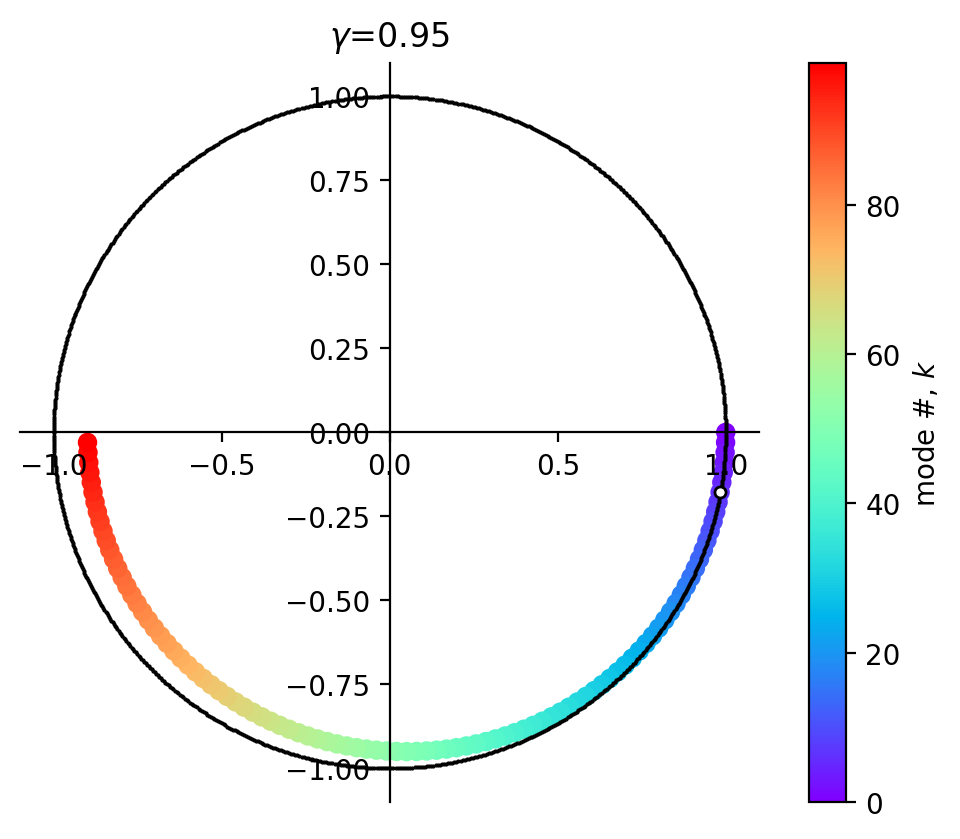

In [5]:
fig, ax = plt.subplots()

# unit circle
t = np.linspace(0, np.pi * 2.0, 1000)
ax.plot(np.cos(t), np.sin(t), 'k.', ms=1)

# All k
K = np.arange(nx)
s = 1 - gamma + gamma * np.exp(- 1j * np.pi * K * hx)
l=ax.scatter(s.real, s.imag,
             c=K, cmap='rainbow')

# The k-mode above
s0 = 1 - gamma + gamma * np.exp(- 1j * np.pi * kmode * hx)
ax.plot(s0.real, s0.imag, 'ko', markerfacecolor='w', ms=4)

c=plt.colorbar(l)
c.set_label('mode #, $k$')
ax.set_aspect(1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_title(f'$\gamma$={gamma}');

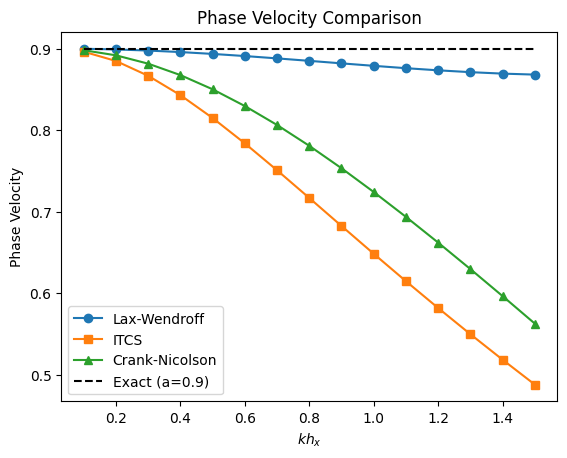

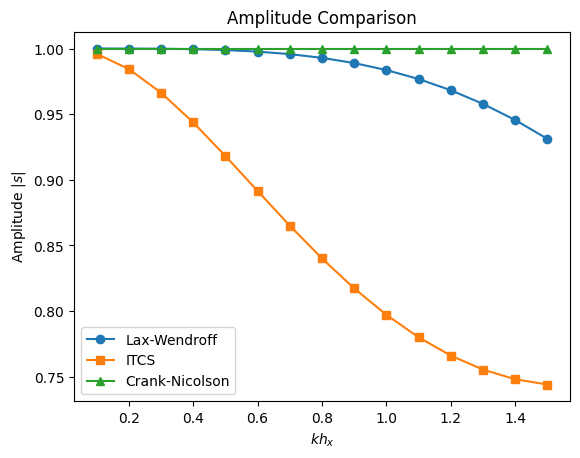